# 1. Introdução

Anteriormente, a principal preocupação do desenhista era conceber e construir um sistema com uma capacidade previamente especificada, enquanto a eficiência e o custo eram de secundária importância.

Atualmente, a tarefa é muito mais demandante e consiste em atingir o objetivo principal (capacidade), porém com o máximo possível de efeitos positivos (eficiência, réditos, benefícios sociais e ambientais) e/ou o mínimo possível de efeitos adversos (consumo de combustível, custos, degradação ambiental)

__Otimização:__ estudo de problemas em que se busca minimizar ou maximizar uma função através da escolha sistemática dos valores de variáveis reais ou inteiras dentro de um conjunto viável.

# 2. Problema de Otimização

Um problema de __programação otimização__ pode ser definido como o problema de maximizar ou minimizar uma função linear sujeita a restrições lineares. 
Restrições podem ser igualdades ou desigualdades.

\\(min (x^2 + 1)\\)

\\(max(2x)\\)

### Exemplo:
Encontrar os números \\(x_1\\) e \\(x_2\\) que maximizam a soma \\(x_1 + x_2\\) sujeita às restrições \\(x_1 \geq 0\\), \\(x_2 \geq 0\\) e <br>
>    \\(x_1 + 2x_2 \leq 4\\) <br>
>    \\(4x_1 + 2x_2 \leq 12\\) <br>
>    \\(-x_1 + x_2 \leq 1\\) <br>

Neste problema temos 2 variáveis e 5 restrições.
- restrições não negatividade
- restrições principais
- função objetivo

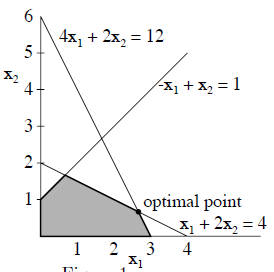

In [2]:
import pulp

In [7]:
vars = {'x1', 'x2'}

lp = pulp.LpProblem(sense=pulp.LpMinimize)
lp_vars = pulp.LpVariable.dicts('vars', vars)



In [8]:
lp_vars

{'x2': vars_x2, 'x1': vars_x1}

In [9]:
# funcao objetivo
lp += lp_vars['x1'] + lp_vars['x2']

# restrições
lp += lp_vars['x1'] + 2*lp_vars['x2'] >= 3
lp += 2*lp_vars['x1'] + lp_vars['x2'] >= 5

#lp += lp_vars['x1'] >= 0
lp += lp_vars['x2'] >= 0

status = lp.solve()
[lp_vars[v].value() for v in vars]

[0.33333333, 2.3333333]

In [6]:
lp

NoName:
MAXIMIZE
1*vars_x1 + 1*vars_x2 + 0
SUBJECT TO
_C1: 4 vars_x1 + 2 vars_x2 <= 12

_C2: vars_x1 + 2 vars_x2 <= 4

_C3: - vars_x1 + vars_x2 <= 1

_C4: vars_x1 >= 0

_C5: vars_x2 >= 0

VARIABLES
vars_x1 free Continuous
vars_x2 free Continuous

### Outros exemplos

Problema: Minimização <br>
Função objetivo: \\(y_1 + y_2\\) <br>
Restrições:
> \\(y_1 + 2y_2 \geq 3\\) <br>
> \\(2y_1 + y_2 \geq 5\\) <br>
> \\(y_2 \geq 0\\) <br>

Problema: Maximização <br>
Função objetivo: \\(x_1 + 2x_2 + 3x_3 + 4x_4 + 5\\) <br>
Restrições: <br>
> \\(4x_1 + 3x_2 + 2x_3 + x_4 \leq 10\\) <br>
> \\(x_1 - x_3 + 2x_4 = 2\\) <br>
> \\(x_1 + x_2 + x_3 + x_4 \geq 1\\) <br>
> \\(x_1 \geq 0\\) <br>
> \\(x_3 \geq 0\\) <br>
> \\(x_4 \geq 0\\) <br>


# 3. Exercício Prático

A ração de gatos Whiscas é produzida pela Uncle Ben's. Uncle Ben's quer produzir a sua ração de gatos o mais barato possível e ao mesmo tempo garantir que os valores nutricionais sejam obedecidos. Assim, eles querem variar a quantidade de cada ingrediente usado (os principais ingredientes são frango, carne, carneiro, arroz, trigo e gel) mantendo os padrões nutricionais. <br>

Os custos do frango, carne e carneiro são R\$ 0,013, R\$ 0,008 e R\$ 0,010 respectivamente, enquanto os custos do arroz, trigo e gel são R\$ 0,002, R\$ 0,005 e R\$ 0,001 respectivamente. Todos os custos são por grama!

Cada ingrediente contribui para o peso total de proteína, gordura, fibra e sal no produto final. As contribuições (em gramas) por grama de ingrediente são dadas na tabela abaixo: <br>

| Ingrediente | Proteína   | Gordura | Fibra |  Sal  |
|-------------|------------|---------|-------|-------|
|   Frango    |    0,100   |  0,080  | 0,001 | 0,002 |
|    Carne    |    0,200   |  0,100  | 0,005 | 0,005 |
|   Carneiro  |    0,150   |  0,110  | 0,003 | 0,007 |
|    Arroz    |    0,000   |  0,010  | 0,100 | 0,002 |
|    Trigo    |    0,040   |  0,010  | 0,150 | 0,008 |
|     Gel     |    0,000   |  0,000  | 0,000 | 0,000 |

A embalagem de Whiskas tem 100g, onde pelo menos 8g são de proteína e 6g de gordura, e no máximo 2g de fibra e 0,4g de sal. <br>

__Problema proposto:__ Obter as porcentagens de ingredientes para criar uma ração com apenas frango e carne obdecendo as restrições nutricionais. <br>

1. Identificar as variáveis de decisão <br>
\\(x_1\\) = porcentagem de carne de frango em uma lata de ração de gatos <br>
\\(x_2\\) = porcentagem de carne de boi em uma lata de ração de gatos <br>

2. Formular a função objetivo <br>
__min__ (0,013\\(x_1\\) + 0,008\\(x_2\\)) <br>

3. Restrições <br>
> 1,000\\(x_1\\) + 1,000\\(x_2\\) = 100,0 <br>
> 0,100\\(x_1\\) + 0,200\\(x_2 \geq \\) 8,0 <br> 
> 0,080\\(x_1\\) + 0,100\\(x_2 \geq \\) 6,0 <br> 
> 0,001\\(x_1\\) + 0,005\\(x_2 \leq \\) 2,0 <br> 
> 0,002\\(x_1\\) + 0,005\\(x_2 \leq \\) 0,4 <br> 

__Solução__:

In [1]:
from pulp import *

In [2]:
prob = LpProblem("Problema da Racao",LpMinimize)

In [3]:
x1 = LpVariable("PorcentagemFrango",0,)
x2 = LpVariable("PorcentagemBoi",0)
x3 = LpVariable("PorcentagemGel",0)

In [4]:
prob += 0.013*x1 + 0.008*x2 + 0.001*x3

In [5]:
prob += x1 + x2 + x3 == 100
prob += 0.100*x1 + 0.200*x2 >= 8.0
prob += 0.080*x1 + 0.100*x2 >= 6.0
prob += 0.001*x1 + 0.005*x2 <= 2.0
prob += 0.002*x1 + 0.005*x2 <= 0.4

In [6]:
prob.writeLP("WhiskasModel.lp")
prob.solve(CPLEX())

1

In [7]:
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
PorcentagemBoi = 60.0
PorcentagemFrango = 0.0
PorcentagemGel = 40.0


In [8]:
print("Custo total de ingredientes por lata =", value(prob.objective))

Custo total de ingredientes por lata = 0.52


In [11]:
prob.variablesDict()

{'PorcentagemFrango': PorcentagemFrango,
 'PorcentagemBoi': PorcentagemBoi,
 'PorcentagemGel': PorcentagemGel}